### Importing required packages...
Here we will be using the following modules and packages

In [8]:
import numpy as np
import pandas as pd
import os
from sklearn.feature_extraction.text import TfidfVectorizer

### Loading data ...
We will first load the data from the extracted files of lexicon having positive and negative words and forma a dataset called prior_data dataset so that we will be using the pos and neg probabilities of the words for further...

In [65]:
data =[]
s = ""
s1 = ""
path = 'opinion-lexicon-English/positive-words.txt'
file = open(path,'r')
# Positive Words from lexicon
with open(path, "r",encoding = "ISO-8859-1") as file1:
    FileContent = file1.read()
    s = str(FileContent)
pos = s.split("\n")

path = 'opinion-lexicon-English/negative-words.txt'
# Negitive Words from lexicon
with open(path, "r", encoding = "ISO-8859-1") as file1:
    FileContent = file1.read()
    s1 = str(FileContent)
neg = s1.split("\n")

prior_words =[]
for i in pos:
    if i !='' and i[0] != ";":
        prior_words.append(i)
        data.append([i,1,0])
for i in neg:
    if i !='' and i[0] != ";":
        prior_words.append(i)
        data.append([i,0,1])
# Prior Dataset
prior_data = pd.DataFrame(data,columns=['word','pos','neg'])
prior_data = prior_data.set_index('word')

In [58]:
prior_data

,pos,neg
word,,
a+,1,0
abound,1,0
abounds,1,0
abundance,1,0
abundant,1,0
...,...,...
zaps,0,1
zealot,0,1
zealous,0,1


### Loading Reviews ...
Reviews will be loaded and preprocessed using nltk to remove stop words. After that we will vectorize in such a way that all words will be columns and rows will be files. This will form our data matrix of order N*K

In [17]:
path = "txt_sentoken/neg"
data = []
label_data = []#only for comparing accuracy purpose
for filepath in os.listdir(path):
    label_data.append(1)
    file_path = path+"/"+filepath
    s = ""
    with open(file_path, "r", encoding = "ISO-8859-1") as file1:
        FileContent = file1.read()
        s = str(FileContent)
    data.append(s)
path = "txt_sentoken/pos"
for filepath in os.listdir(path):
    label_data.append(0)
    file_path = path+"/"+filepath
    s = ""
    with open(file_path, "r", encoding = "ISO-8859-1") as file1:
        FileContent = file1.read()
        s = str(FileContent)
    data.append(s)

In [18]:
data[0]

'plot : two teen couples go to a church party , drink and then drive . \nthey get into an accident . \none of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . \nwhat\'s the deal ? \nwatch the movie and " sorta " find out . . . \ncritique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . \nwhich is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn\'t snag this one correctly . \nthey seem to have taken this pretty neat concept , but executed it terribly . \nso what are the problems with the movie ? \nwell , its main problem is that it\'s simply too jumbled . \nit starts off " normal " but then downshifts into this " fantasy " world in which you , as an audience membe

In [11]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [12]:
from nltk.corpus import stopwords 

In [13]:
stop_words = stopwords.words('english')

In [14]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [16]:
vec = TfidfVectorizer(lowercase=True, stop_words='english',binary=True, max_features=7000,use_idf=False, smooth_idf=False)

In [19]:
X = pd.DataFrame(vec.fit_transform(data).toarray(), columns=vec.get_feature_names())

In [20]:
X

,000,10,100,1000,101,11,12,13,137,13th,...,youngsters,youth,zane,zany,zellweger,zero,zeta,zombie,zone,zooms
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
features = X.columns

### Using PyTorch ...
Here we will be using pytorch framework to form the nodes and layers. As we have 2 labels there will two nodes in outer layer and K features as input layer. The weights will be randomly initialized and will be modified on each iteration. We will first get p cap which is the probailities summation of label vectors of each row haivng feature f. This will be used as estimated value and will be compared with that of prior knowledge their divergence will give the loss value basing on the loss value the weights of each labela nd feature will be updated. Refer to the images below...

### PCap calculation ...
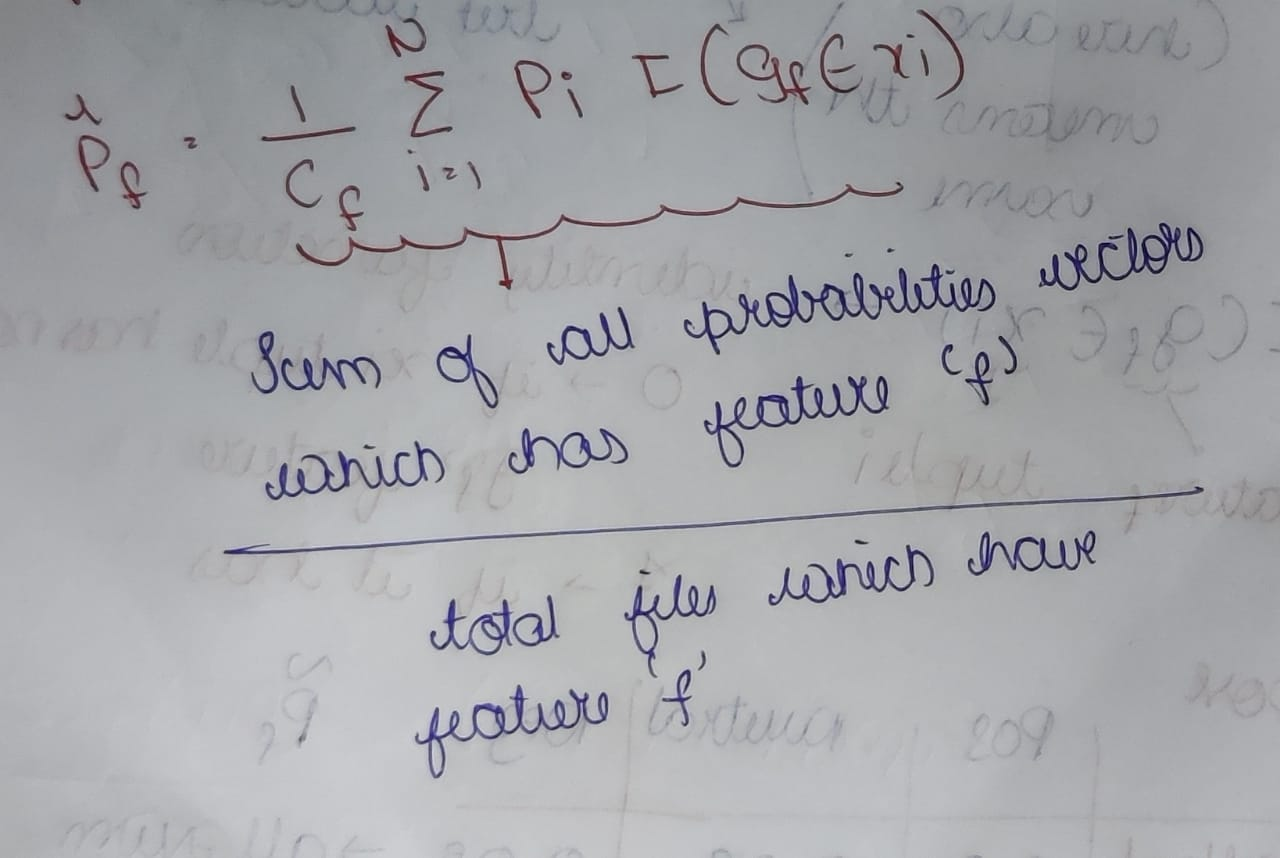
### Loss Function ...
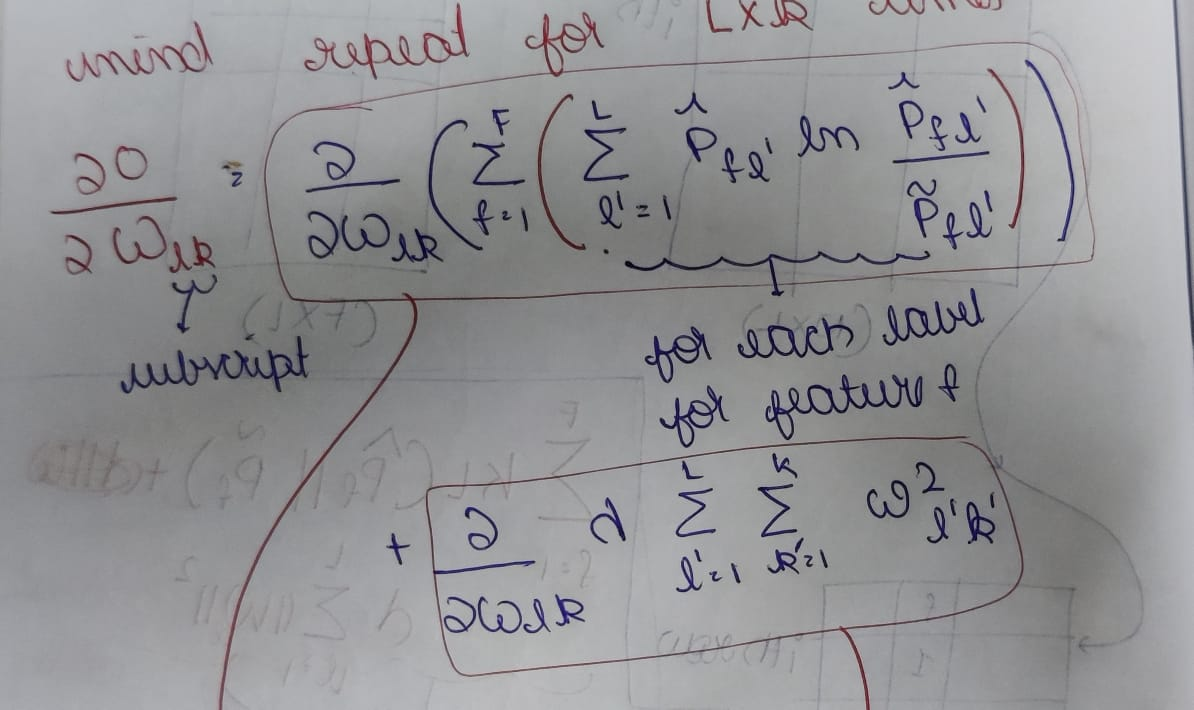

In [28]:
import torch

In [33]:
N,K = X.shape
print("Dataset has total tupels ",N," and total features ",K)

Dataset has total tupels  2000  and total features  7000


In [50]:
F,L = prior_data.shape
print("Prior knowledge has total features ",F," and total labels ",L)

Prior knowledge has total features  6789  and total labels  2


In [51]:
# We will be using pytorch 
# A torch.Tensor is a multi-dimensional matrix containing elements of a single data type.
prior_matrix = torch.tensor(prior_data.to_numpy(), dtype=torch.float)
X_matrix = torch.tensor(X.to_numpy(),dtype=torch.float)
Weights_matrix = torch.randn(L,K,requires_grad = True)

In [52]:
prior_data

,pos,neg
word,,
a+,1,0
abound,1,0
abounds,1,0
abundance,1,0
abundant,1,0
...,...,...
zaps,0,1
zealot,0,1
zealous,0,1


In [60]:
C_matrix = X.sum(axis = 0)# Count of each words in each file will be indicated by this
C_matrix

000        92.0
10        187.0
100        74.0
1000       12.0
101        15.0
          ...  
zero       42.0
zeta       19.0
zombie     13.0
zone       27.0
zooms      12.0
Length: 7000, dtype: float64

In [66]:
prior_words

['a+',
 'abound',
 'abounds',
 'abundance',
 'abundant',
 'accessable',
 'accessible',
 'acclaim',
 'acclaimed',
 'acclamation',
 'accolade',
 'accolades',
 'accommodative',
 'accomodative',
 'accomplish',
 'accomplished',
 'accomplishment',
 'accomplishments',
 'accurate',
 'accurately',
 'achievable',
 'achievement',
 'achievements',
 'achievible',
 'acumen',
 'adaptable',
 'adaptive',
 'adequate',
 'adjustable',
 'admirable',
 'admirably',
 'admiration',
 'admire',
 'admirer',
 'admiring',
 'admiringly',
 'adorable',
 'adore',
 'adored',
 'adorer',
 'adoring',
 'adoringly',
 'adroit',
 'adroitly',
 'adulate',
 'adulation',
 'adulatory',
 'advanced',
 'advantage',
 'advantageous',
 'advantageously',
 'advantages',
 'adventuresome',
 'adventurous',
 'advocate',
 'advocated',
 'advocates',
 'affability',
 'affable',
 'affably',
 'affectation',
 'affection',
 'affectionate',
 'affinity',
 'affirm',
 'affirmation',
 'affirmative',
 'affluence',
 'affluent',
 'afford',
 'affordable',
 'af

In [86]:
# Helper functions
# Tuples probability Wtxi and softmax over them
def probabilitiesOfTuples(X_matrix, Weights_matrix):
    # Basically we will be doing for each row the same processes
    return torch.softmax(X_matrix @ Weights_matrix.t(), axis=1)

# PCap will be found by above explaination where we will find files having the feature 
# f and we will add up all probs and divide by no of files
def pCapFinder (X_matrix,P,C_matrix,prior_words,prior_matrix):
    F = len(prior_data)
    PCap = torch.zeros_like(prior_matrix)
    for feature in range(F):
        word = prior_words[feature]
        summation = np.array([0,0])
        k = 0
        try :
            for i in X[word]:
                if i > 0:
                    # Feature is present in that file
                    summation += P[k]
                k += 1
            T = torch.tensor(summation)
            PCap[feature] = (T)/C_matrix[word]
        except:
            PCap[feature] = 0
    return PCap

# Torch supports predefined KL Divergence
def KLDivergence(pCap,prior_matrix,Weights_matrix):
    loss_value = torch.nn.functional.kl_div(pCap, prior_matrix, reduction='sum')+0.005 * ((Weights_matrix * Weights_matrix).sum())
    return loss_value

In [99]:
n = 100
for n in range(n):
    # Calling probabilitiesOfTuples which will return matrix of size n*2
    P = probabilitiesOfTuples(X_matrix, Weights_matrix)
    # Calling pCapFinder to get the pCap values which will be N*2 Matrix
    PCap = pCapFinder(X, P, C_matrix, prior_words, prior_matrix)
    # Loss will be computed by predefined torch function
    loss = KLDivergence(PCap, prior_matrix, Weights_matrix)
    # The loss value will be propagated backward and required changes to the weights will be made
    loss.backward()
    with torch.no_grad():
        Weights_matrix -= Weights_matrix.grad * 0.05
        Weights_matrix.grad.zero_()
    # Predicted values will returned in the form N*1 matrix
    pred = np.argmax(torch.softmax(X_matrix @ Weights_matrix.t(), axis=1).detach().numpy(), axis=1)

In [97]:
PCap

tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        ...,
        [0., 0.],
        [0., 0.],
        [0., 0.]])

In [100]:
from sklearn.metrics import accuracy_score
# Finding the accuracy with actual labels to verify the model
print("The model accuracy is ",accuracy_score(pred,label_data)," more iterations are needed.")

The model accuracy is  0.506  more iterations are needed.
